# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Load CIFAR-10 data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

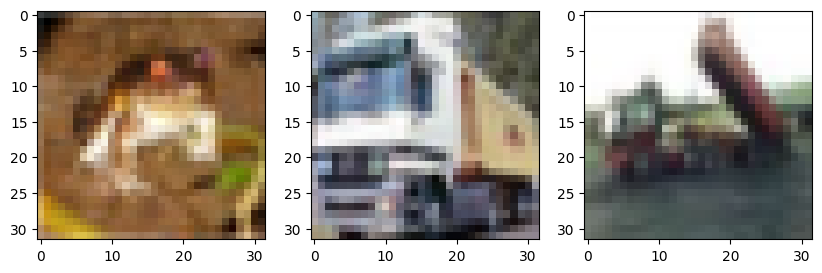

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    ax[i].imshow(x_train[i])
    ax[i].axis('on')

Parse numbers as floats

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalize data

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 3
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(no_classes, activation='softmax'))

model_1.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_1 = model_1.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split,
            validation_data=(x_test, y_test))

Epoch 1/3
391/391 [==============================] - 81s 202ms/step - loss: 2.1605 - accuracy: 0.1825 - val_loss: 1.9995 - val_accuracy: 0.2573
Epoch 2/3
391/391 [==============================] - 80s 205ms/step - loss: 1.9321 - accuracy: 0.2839 - val_loss: 1.9139 - val_accuracy: 0.3156
Epoch 3/3
391/391 [==============================] - 78s 200ms/step - loss: 1.8037 - accuracy: 0.3381 - val_loss: 1.7394 - val_accuracy: 0.3671


### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 3
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_2 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/3
391/391 [==============================] - 81s 203ms/step - loss: 2.7013 - accuracy: 0.4248 - val_loss: 7.1567 - val_accuracy: 0.1000
Epoch 2/3
391/391 [==============================] - 80s 203ms/step - loss: 1.7927 - accuracy: 0.5516 - val_loss: 49.9824 - val_accuracy: 0.1000
Epoch 3/3
391/391 [==============================] - 78s 201ms/step - loss: 1.4123 - accuracy: 0.6033 - val_loss: 33.1836 - val_accuracy: 1.0000e-04


### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 3
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128))
model_3.add(Dropout(0.5))
model_3.add(Activation("relu"))
model_3.add(Dense(64))
model_3.add(Dropout(0.5))
model_3.add(Activation("softmax"))

model_3.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_3 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/3
391/391 [==============================] - 83s 212ms/step - loss: 1.2549 - accuracy: 0.6208 - val_loss: 104.2060 - val_accuracy: 0.1000
Epoch 2/3
391/391 [==============================] - 84s 215ms/step - loss: 1.1189 - accuracy: 0.6483 - val_loss: 79.0121 - val_accuracy: 0.0000e+00
Epoch 3/3
391/391 [==============================] - 84s 214ms/step - loss: 1.0276 - accuracy: 0.6705 - val_loss: 43.3054 - val_accuracy: 0.1000


### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Model configuration
batch_size = 128
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 3
optimizer = Adam()
validation_split = 0.2
verbosity = 1

input_shape = (img_width, img_height, img_num_channels)

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(BatchNormalization())
model_4.add(Dense(128))
model_4.add(Dropout(0.5))
model_4.add(Activation("relu"))
model_4.add(BatchNormalization())
model_4.add(Dense(64))
model_4.add(Dropout(0.5))
model_4.add(Activation("softmax"))

model_4.compile(loss=sparse_categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Обучите созданную модель

In [ ]:
history_4 = model_2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity,
                      validation_split=validation_split,
                      validation_data=(x_test, y_test))

Epoch 1/3
391/391 [==============================] - 84s 215ms/step - loss: 0.9956 - accuracy: 0.6738 - val_loss: 83.6888 - val_accuracy: 0.1609
Epoch 2/3
391/391 [==============================] - 79s 203ms/step - loss: 0.9411 - accuracy: 0.6888 - val_loss: 70.4268 - val_accuracy: 0.1001
Epoch 3/3
391/391 [==============================] - 79s 202ms/step - loss: 0.9023 - accuracy: 0.6985 - val_loss: 95.1296 - val_accuracy: 0.1000


### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

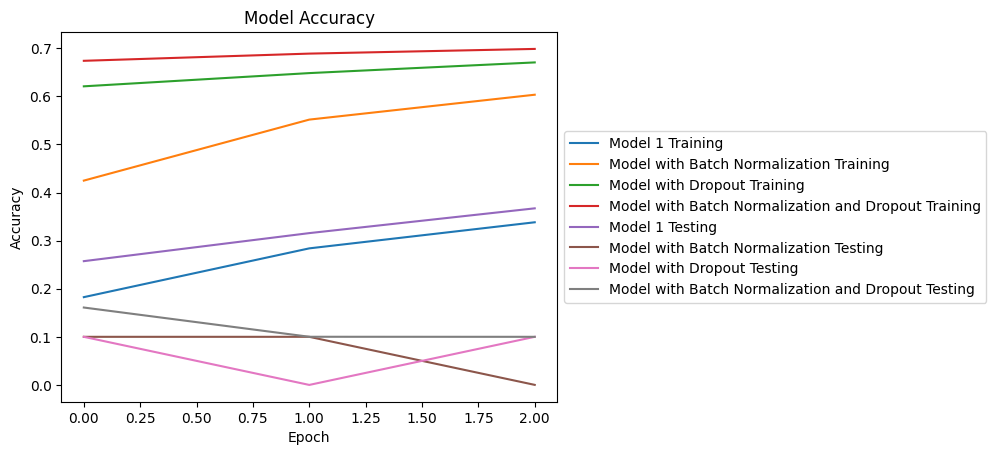

In [148]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_3.history['accuracy'])
plt.plot(history_4.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training',
            'Model with Batch Normalization Training', 
            'Model with Dropout Training',
            'Model with Batch Normalization and Dropout Training',
            'Model 1 Testing',
            'Model with Batch Normalization Testing',
            'Model with Dropout Testing',
            'Model with Batch Normalization and Dropout Testing'],
             loc='center left', bbox_to_anchor=(1, 0.5))

4 нейронная сеть с BatchNormalization() и Dropout() хорошо обучается чем остальные, точность составляет 70 %. 

3 нейронная сеть с Dropout(). Точность  70%. 

2 нейронная сеть с BatchNormalization(). Точность 55%

1 нейронная сеть без BatchNormalization() и Dropout(). Точность  65%

Использование BatchNormalization() и Dropout() хороший вариант при проектировании архитектуры нейронной сети.  

Точность обучения возрастает при использовании BatchNormalization() и Dropout() методов.